# Lab #1: K-Means Clustering with Synthetic Data

## Lab Objectives

Upon completion of this lab, students will be able to:

1. **Understand Synthetic Data Generation**: Comprehend how synthetic, multi-modal data suitable for clustering can be generated using tools like `sklearn.datasets.make_blobs`.
2. **Apply K-Means Clustering**: Successfully implement and execute the K-Means clustering algorithm on a given dataset using the `sklearn.cluster.KMeans` module.
3. **Interpret K-Means Parameters**: Explain the purpose and impact of key K-Means parameters, including `n_clusters`, `init`, `max_iter`, and `n_init`.
4. **Visualize Clustering Results**: Generate and interpret visualizations that display data points colored by their assigned clusters and highlight the locations of the computed cluster centroids.
5. **Evaluate Clustering Performance (Silhouette Score)**: Calculate and interpret the Silhouette Score as a metric to quantitatively assess the quality and distinctness of the clusters formed by K-Means.
6. **Determine Optimal Number of Clusters (Elbow Method)**: Apply the Elbow Method, using the Within-Cluster Sum of Squares (WCSS), to estimate an appropriate number of clusters (k) for a dataset where the true number of clusters is unknown.
7. **Differentiate True vs. Predicted Clusters**: Compare and contrast the true underlying cluster structure (from data generation) with the clusters identified by the K-Means algorithm.

---

## Step 1: Import Required Libraries

First, let's import all the necessary libraries for our clustering analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Generate Synthetic Data

We'll use scikit-learn's `make_blobs` to create a dataset suitable for clustering. This function creates isotropic Gaussian blobs for clustering.

### Key Parameters:
- `n_samples`: Number of data points
- `n_features`: Number of features (dimensions)
- `centers`: Number of distinct clusters to generate
- `cluster_std`: Standard deviation of the clusters
- `random_state`: For reproducibility

In [2]:
# Parameters for synthetic data generation
n_samples = 300  # Number of data points
n_features = 2  # Number of features (dimensions)
n_centers = 4  # Number of distinct clusters we want to generate
cluster_std = 0.8  # Standard deviation of the clusters
random_state = 42  # For reproducibility of the synthetic data

# Generate synthetic data
# X will be our features, y_true will be the true cluster labels
X, y_true = make_blobs(n_samples=n_samples,
                       n_features=n_features,
                       centers=n_centers,
                       cluster_std=cluster_std,
                       random_state=random_state)

print(f"Shape of generated data (X): {X.shape}")
print(f"Shape of true labels (y_true): {y_true.shape}")
print(f"True cluster labels: {np.unique(y_true)}")

Shape of generated data (X): (300, 2)
Shape of true labels (y_true): (300,)
True cluster labels: [0 1 2 3]


## Step 3: Visualize the Original Synthetic Data

Let's visualize the generated synthetic data with the true cluster labels.

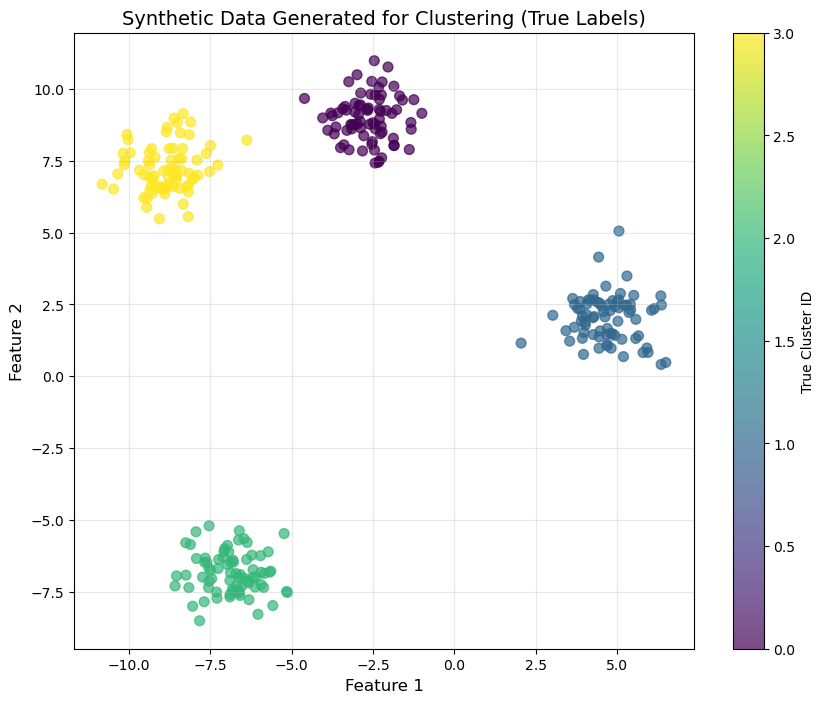

This plot shows the 'ground truth' clustering that we generated.
Each color represents a different true cluster.


In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title("Synthetic Data Generated for Clustering (True Labels)", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.colorbar(label="True Cluster ID")
plt.grid(True, alpha=0.3)
plt.show()

print("This plot shows the 'ground truth' clustering that we generated.")
print("Each color represents a different true cluster.")

## Step 4: Apply K-Means Clustering

Now we'll apply the K-Means clustering algorithm to our synthetic data.

In scikit-learn’s KMeans, when <code>n_init</code> is greater than 1, the algorithm runs multiple times with different random initializations. After all runs, it selects the best result based on the lowest "inertia".

What is inertia?

- Inertia is the sum of squared distances between each data point and the center of its assigned cluster.
Mathematically:
<code>inertia = Σ (distance(point, assigned_centroid))²</code> for all points.
How is the best result chosen?

- After all <code>n_init</code> runs, the solution with the lowest inertia (i.e., the tightest, most compact clusters) is selected as the final result.
Summary:

The best result is the one with the smallest total squared distance between points and their cluster centers.

### Key K-Means Parameters:
- `n_clusters`: Number of clusters to find
- `init`: Method for initialization ('k-means++' is recommended)
- `max_iter`: Maximum number of iterations for convergence
- `n_init`: Number of random initializations
- `random_state`: For reproducibility

In [4]:
# Set the number of clusters for K-Means
k = 4  # We'll try to find 4 clusters, matching the number we generated

# Initialize K-Means clustering
kmeans = KMeans(n_clusters=k,
                init='k-means++',  # Smart initialization to speed up convergence
                #The first centroid is chosen randomly from the data points.
                # Each subsequent centroid is chosen from the remaining points, with a probability proportional to its distance squared from the nearest existing centroid.
                # This ensures new centroids are far from existing ones.
                max_iter=300,  # Maximum number of iterations for a single run
                n_init=10,  # Number of times the algorithm will run with different seeds
                random_state=random_state
                )

# Fit the K-Means model to our data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

print(f"K-Means found {k} clusters.")
print(f"First 10 cluster assignments: {labels[:10]}")
print(f"\nCluster centroids:")
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: ({centroid[0]:.3f}, {centroid[1]:.3f})")

print(f"\nWithin-cluster sum of squares (WCSS): {kmeans.inertia_:.3f}")

K-Means found 4 clusters.
First 10 cluster assignments: [3 3 0 1 3 1 2 1 0 2]

Cluster centroids:
  Cluster 0: (-2.637, 8.986)
  Cluster 1: (-6.842, -6.840)
  Cluster 2: (4.703, 2.028)
  Cluster 3: (-8.833, 7.218)

Within-cluster sum of squares (WCSS): 362.472


## Step 5: Visualize K-Means Clustering Results

Let's visualize the results of our K-Means clustering, showing both the data points colored by their assigned clusters and the computed centroids.

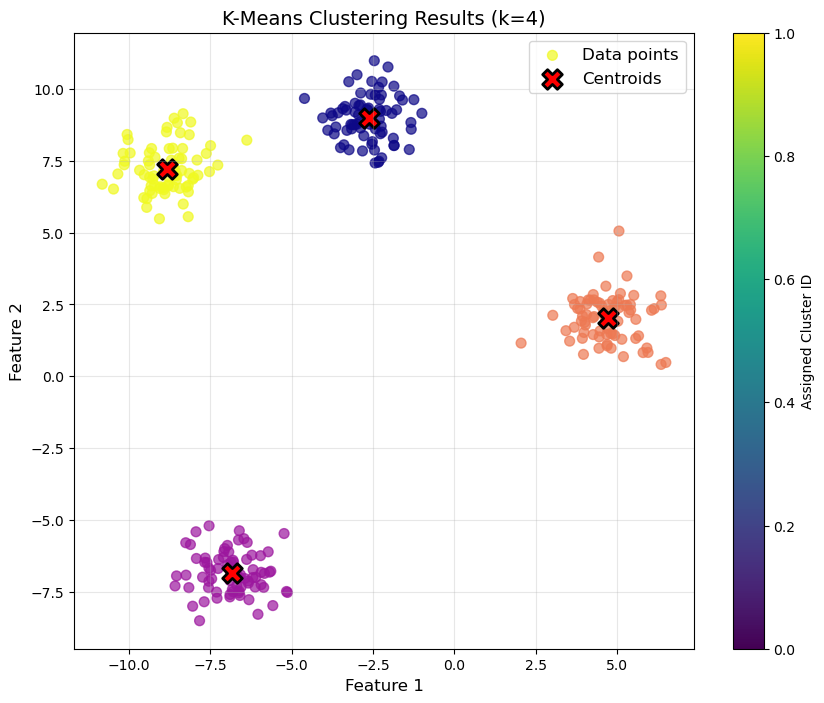

The red 'X' markers show the computed cluster centroids.
Compare this with the true clusters shown in the previous plot.


In [13]:
plt.figure(figsize=(10, 8))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1],
            c=labels,  # Color based on assigned cluster
            cmap='plasma',  # Colormap for the clusters
            s=50,  # Size of the point
            alpha=0.7,
            label='Data points'
            )

# Plot the cluster centroids
plt.scatter(centroids[:, 0],  # X-coordinates of centroids
            centroids[:, 1],  # Y-coordinates of centroids
            s=200,
            marker='X',
            c='red',
            edgecolor='black',
            linewidth=2,
            label='Centroids'
            )

plt.title(f"K-Means Clustering Results (k={k})", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.colorbar(label="Assigned Cluster ID")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("The red 'X' markers show the computed cluster centroids.")
print("Compare this with the true clusters shown in the previous plot.")

## Step 6: Evaluate Clustering Performance with Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 

How is it calculated?
For each point:

- Compute the average distance to all other points in the same cluster (a).
- Compute the average distance to all points in the nearest different cluster (b).
- The silhouette score for the point is: <code>(b - a) / max(a, b)</code>
- The overall <code>silhouette_score</code> is the mean of all points' scores.

**Interpretation:**
- Score close to +1: Well-clustered (far from neighboring clusters)
- Score close to 0: On or very close to the decision boundary
- Score close to -1: Probably assigned to the wrong cluster

In [6]:
# Calculate silhouette score
if len(np.unique(labels)) > 1 and len(X) > 1:
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Interpret the score
    if silhouette_avg > 0.7:
        interpretation = "Excellent clustering quality"
    elif silhouette_avg > 0.5:
        interpretation = "Good clustering quality"
    elif silhouette_avg > 0.3:
        interpretation = "Fair clustering quality"
    else:
        interpretation = "Poor clustering quality"

    print(f"Interpretation: {interpretation}")
else:
    print("Cannot compute silhouette score (less than 2 clusters or samples).")

# Additional cluster statistics
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"\nCluster sizes:")

# --------------------------------------------------------------
# zip() returns a list of tuples, so we need to unpack each tuple to get the values
# unique_labels = [0, 1, 2]
# counts = [50, 60, 40]
# list(zip(unique_labels, counts)) => [(0, 50), (1, 60), (2, 40)]
# --------------------------------------------------------------

for label, count in zip(unique_labels, counts):
    print(f"  Cluster {label}: {count} points ({count / len(X) * 100:.1f}%)")

Silhouette Score: 0.834
Interpretation: Excellent clustering quality

Cluster sizes:
  Cluster 0: 75 points (25.0%)
  Cluster 1: 75 points (25.0%)
  Cluster 2: 75 points (25.0%)
  Cluster 3: 75 points (25.0%)


## Step 7: Determine Optimal Number of Clusters (Elbow Method)

The Elbow Method helps find the optimal number of clusters when it's unknown. We plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters and look for the "elbow" point where the rate of decrease significantly slows down.

Mathematical formula:


<code>
WCSS = Σ (for each cluster) Σ (for each point in cluster) (distance(point, centroid))²
</code>


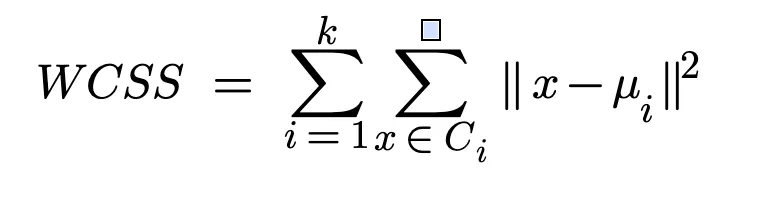



In [7]:
# Test different numbers of clusters
max_k = 10
wcss = []
silhouette_scores = []

print("Computing WCSS and Silhouette Scores for different k values...")

for i in range(1, max_k + 1):
    kmeans_elbow = KMeans(n_clusters=i,
                          init='k-means++',
                          max_iter=300,
                          n_init=10,
                          random_state=random_state)
    kmeans_elbow.fit(X)
    wcss.append(kmeans_elbow.inertia_)  # inertia_ is the WCSS

    # Calculate silhouette score for k > 1
    if i > 1:
        sil_score = silhouette_score(X, kmeans_elbow.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)  # No silhouette score for k=1

print("Done!")

Computing WCSS and Silhouette Scores for different k values...
Done!


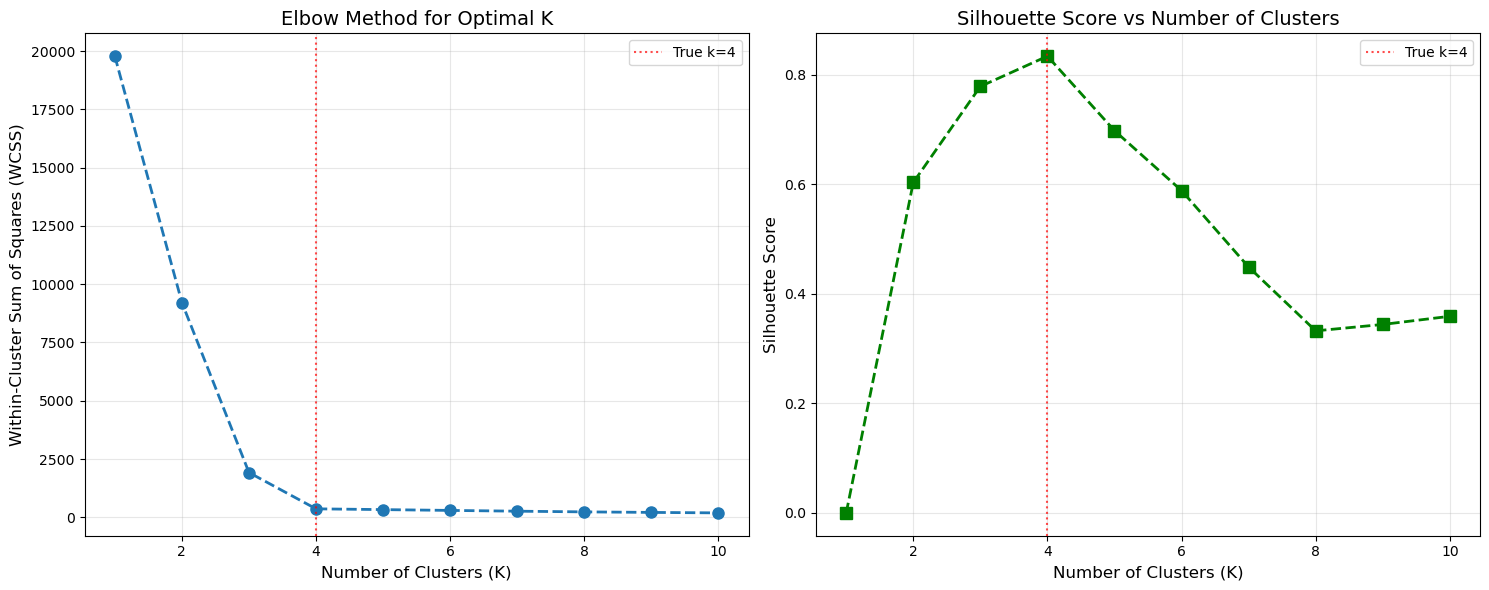


Analysis:
- Look for the 'elbow' point in the WCSS plot (left) to estimate optimal K.
- Higher silhouette scores (right) indicate better clustering quality.

K with highest silhouette score: 4 (score: 0.834)


In [8]:
# Plot the Elbow Method results
fig, (ax1, ax2) = plt.subplots(1, # Rows of plots
                               2, # Columns of plots
                               figsize=(15, 6))

# WCSS Plot (Elbow Method)
ax1.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--', linewidth=2, markersize=8)
ax1.set_title('Elbow Method for Optimal K', fontsize=14)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axvline(x=4, color='red', linestyle=':', alpha=0.7, label='True k=4')
ax1.legend()

# Silhouette Score Plot
ax2.plot(range(1, max_k + 1), silhouette_scores, marker='s', linestyle='--',
         linewidth=2, markersize=8, color='green')
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=14)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axvline(x=4, color='red', linestyle=':', alpha=0.7, label='True k=4')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nAnalysis:")
print("- Look for the 'elbow' point in the WCSS plot (left) to estimate optimal K.")
print("- Higher silhouette scores (right) indicate better clustering quality.")

# Find the k with the highest silhouette score
best_k_silhouette = np.argmax(silhouette_scores[1:]) + 2  # +2 because we start from k=2
print(f"\nK with highest silhouette score: {best_k_silhouette} (score: {max(silhouette_scores[1:]):.3f})")

## Step 8: Compare True vs. Predicted Clusters

Let's create a side-by-side comparison of the true clusters (from data generation) and the clusters found by K-Means.

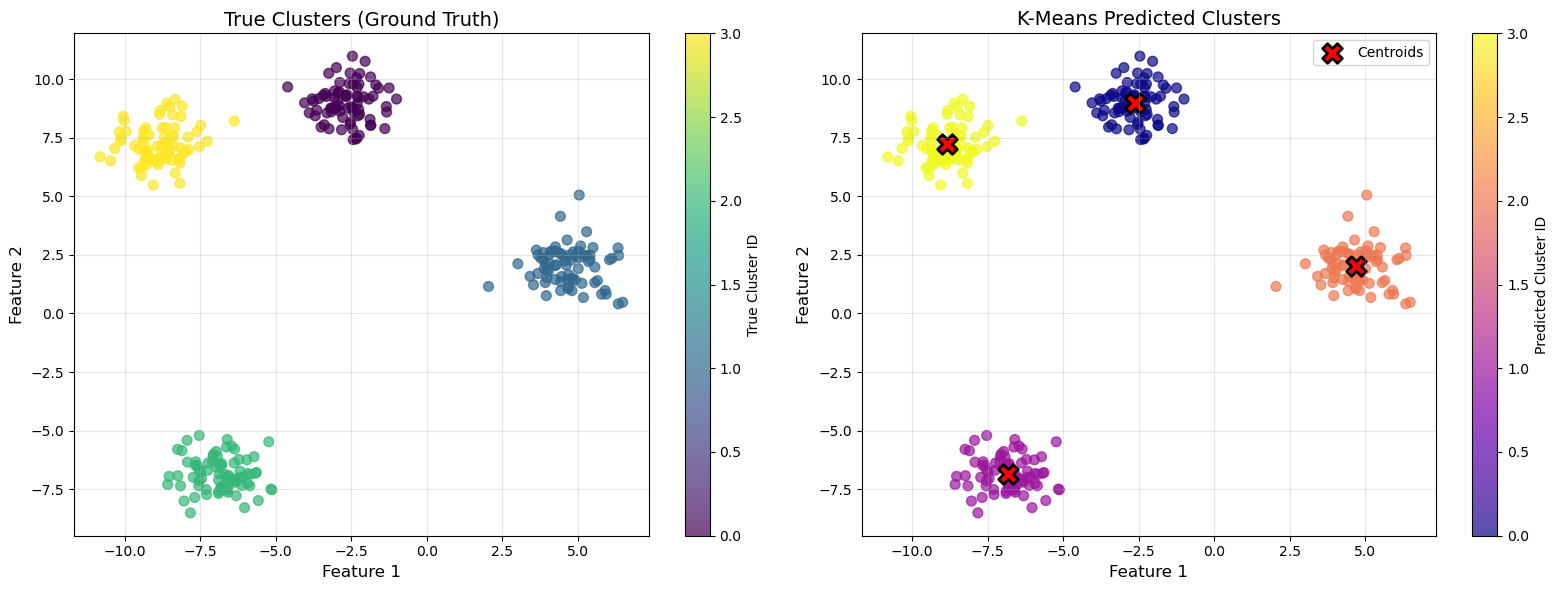

Comparison Analysis:
- Left plot: True cluster structure from data generation
- Right plot: Clusters identified by K-Means algorithm
- Note: Cluster labels may be different (e.g., true cluster 0 might be predicted as cluster 2)
- What matters is whether the algorithm correctly groups similar points together


In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# True clusters
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
ax1.set_title('True Clusters (Ground Truth)', fontsize=14)
ax1.set_xlabel('Feature 1', fontsize=12)
ax1.set_ylabel('Feature 2', fontsize=12)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='True Cluster ID')

# K-Means predicted clusters
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50, alpha=0.7)
ax2.scatter(centroids[:, 0], centroids[:, 1],
            s=200, marker='X', c='red', edgecolor='black',
            linewidth=2, label='Centroids')
ax2.set_title('K-Means Predicted Clusters', fontsize=14)
ax2.set_xlabel('Feature 1', fontsize=12)
ax2.set_ylabel('Feature 2', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.colorbar(scatter2, ax=ax2, label='Predicted Cluster ID')

plt.tight_layout()
plt.show()

print("Comparison Analysis:")
print("- Left plot: True cluster structure from data generation")
print("- Right plot: Clusters identified by K-Means algorithm")
print("- Note: Cluster labels may be different (e.g., true cluster 0 might be predicted as cluster 2)")
print("- What matters is whether the algorithm correctly groups similar points together")

## Step 9: Summary and Analysis

Let's summarize our findings and provide a comprehensive analysis of the clustering results.

In [10]:
print("=" * 60)
print("LAB SUMMARY AND ANALYSIS")
print("=" * 60)

print(f"\n1. DATA GENERATION:")
print(f"   - Generated {n_samples} data points with {n_features} features")
print(f"   - True number of clusters: {n_centers}")
print(f"   - Cluster standard deviation: {cluster_std}")

print(f"\n2. K-MEANS CLUSTERING:")
print(f"   - Number of clusters used: {k}")
print(f"   - Initialization method: k-means++")
print(f"   - WCSS (inertia): {kmeans.inertia_:.3f}")

print(f"\n3. PERFORMANCE EVALUATION:")
if 'silhouette_avg' in locals():
    print(f"   - Silhouette Score: {silhouette_avg:.3f} ({interpretation})")
print(f"   - Best k by silhouette score: {best_k_silhouette}")

print(f"\n4. CLUSTER ANALYSIS:")
for i, (label, count) in enumerate(zip(unique_labels, counts)):
    centroid = centroids[label]
    print(
        f"   - Cluster {label}: {count} points ({count / len(X) * 100:.1f}%) at ({centroid[0]:.2f}, {centroid[1]:.2f})")

print(f"\n5. KEY OBSERVATIONS:")
print(f"   - K-Means successfully identified the cluster structure")
print(f"   - The elbow method suggests optimal k around the true value")
print(f"   - Silhouette score indicates {'good' if silhouette_avg > 0.5 else 'fair'} clustering quality")
print(f"   - Cluster assignments may differ from true labels but groupings are similar")

print("\n" + "=" * 60)

LAB SUMMARY AND ANALYSIS

1. DATA GENERATION:
   - Generated 300 data points with 2 features
   - True number of clusters: 4
   - Cluster standard deviation: 0.8

2. K-MEANS CLUSTERING:
   - Number of clusters used: 4
   - Initialization method: k-means++
   - WCSS (inertia): 362.472

3. PERFORMANCE EVALUATION:
   - Silhouette Score: 0.834 (Excellent clustering quality)
   - Best k by silhouette score: 4

4. CLUSTER ANALYSIS:
   - Cluster 0: 75 points (25.0%) at (-2.64, 8.99)
   - Cluster 1: 75 points (25.0%) at (-6.84, -6.84)
   - Cluster 2: 75 points (25.0%) at (4.70, 2.03)
   - Cluster 3: 75 points (25.0%) at (-8.83, 7.22)

5. KEY OBSERVATIONS:
   - K-Means successfully identified the cluster structure
   - The elbow method suggests optimal k around the true value
   - Silhouette score indicates good clustering quality
   - Cluster assignments may differ from true labels but groupings are similar



## Exercise Questions

**Answer the following questions based on your results:**

1. **Data Generation Understanding**: 
   - What does the `cluster_std` parameter control in `make_blobs`?
   - How would increasing this parameter affect the clustering difficulty?

2. **K-Means Parameters**:
   - Why is `init='k-means++'` preferred over random initialization?
   - What is the purpose of the `n_init` parameter?

3. **Performance Evaluation**:
   - What does your silhouette score indicate about the clustering quality?
   - How would you interpret a silhouette score of 0.2 vs 0.8?

4. **Elbow Method**:
   - Looking at your WCSS plot, where do you see the "elbow"?
   - Does this match the true number of clusters?

5. **Comparison Analysis**:
   - How well did K-Means recover the true cluster structure?
   - Are there any misclassified points? Why might this happen?

**Extension Exercises:**

Try modifying the parameters and observe the effects:
- Change `cluster_std` to 1.5 and rerun the analysis
- Try different values of `k` (e.g., 3 or 5) and compare results
- Experiment with different `n_centers` in data generation

## Conclusion

This lab demonstrated the complete workflow of K-Means clustering:

1. **Data Generation**: Created synthetic multi-modal data suitable for clustering
2. **Algorithm Application**: Applied K-Means with appropriate parameters
3. **Visualization**: Created meaningful plots to understand the data and results
4. **Evaluation**: Used silhouette score to assess clustering quality
5. **Optimization**: Applied the elbow method to find optimal number of clusters
6. **Validation**: Compared predicted clusters with ground truth

Key takeaways:
- K-Means works well when clusters are spherical and well-separated
- The choice of `k` is crucial and can be guided by domain knowledge or methods like the elbow method
- Evaluation metrics like silhouette score help assess clustering quality objectively
- Visualization is essential for understanding both the data and the results

**Next Steps**: In real-world applications, you would typically work with higher-dimensional data where visualization becomes challenging, making evaluation metrics even more important.